 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csvpath = Path("Resources/whale_returns.csv")


In [3]:
# Count nulls
whales_df =  pd.read_csv(whale_csvpath) 
whales_df.head()
whales_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whales_df = whales_df.dropna().copy()
whales_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
returns_csvpath = Path("Resources/algo_returns.csv")

In [6]:
# Count nulls
returns_df = pd.read_csv(returns_csvpath) 
returns_df.head()
returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
returns_df = returns_df.dropna().copy()
returns_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_csvpath = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.info()
sp500_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '', regex=True)

In [11]:
# Fix Data Types
sp500_df = sp500_df["Close"].astype("float")

In [12]:
sp500_df.dtypes

dtype('float64')

In [13]:
# Calculate Daily Returns
daily_returns = (sp500_df - sp500_df.shift(1)) / sp500_df.shift(1)
daily_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [14]:
# Drop nulls
sp500_df= sp500_df.dropna().copy
sp500_df

<bound method NDFrame.copy of Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64>

In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename (index={"Close": "Daily Closing Price"})

sp500_df.head()

AttributeError: 'function' object has no attribute 'rename'

## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
sp500_df2 = pd.read_csv(sp500_csvpath)
returns_df2 = pd.read_csv(returns_csvpath)
whales_df2 =  pd.read_csv(whale_csvpath) 
combined_returns = pd.concat([whales_df2, returns_df2, sp500_df2], axis="rows", join="inner")
combined_returns

,Date
0,2015-03-02
1,2015-03-03
2,2015-03-04
3,2015-03-05
4,2015-03-06
...,...
1644,5-Oct-12
1645,4-Oct-12
1646,3-Oct-12
1647,2-Oct-12


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [27]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

sp500_df2['Close'] = sp500_df2['Close'].str.replace('$', '', regex=True)

sp500_df2 = sp500_df2['Close'].astype('float')
whales_df2 = sp500_df2['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC'].astype('float')
returns_df2 = returns_df2['Algo 1','Algo 2'].astype('float')

KeyError: 'Close'

In [28]:
# Plot daily returns of all portfolios
combined_returns = [sp500_df2, whales_df2,returns_df2]
combined_returns = pd.concat(combined_returns)
combined_daily_returns = (combined_returns - combined_returns.shift(1)) / combined_returns.shift(1)
combined_daily_returns.plot()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_daily_returns).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


AttributeError: 'function' object has no attribute 'plot'

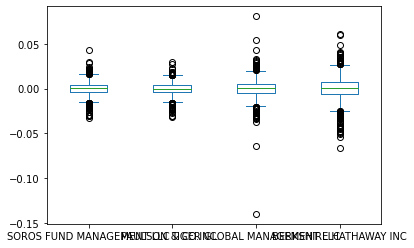

In [29]:
# Box plot to visually show risk
whales_df.plot.box()
sp500_df.plot.box()
returns_df.plot.box()

### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios
daily_std = cumulative_returns.std()
daily_std.head()

NameError: name 'cumulative_returns' is not defined

### Determine which portfolios are riskier than the S&P 500

In [31]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = SP500_Returns.std()

# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

NameError: name 'SP500_Returns' is not defined

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<bound method Rolling.mean of Rolling [window=21,center=False,axis=0,method=single]>

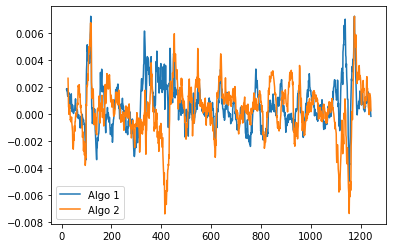

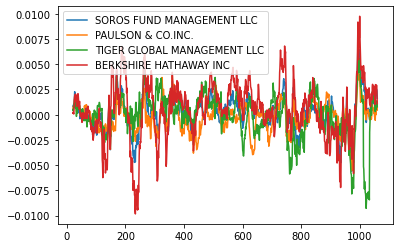

In [34]:
SP500_Returns3 = pd.read_csv(sp500_csvpath)
algo_df3 = pd.read_csv(returns_csvpath)
Whale_Returns3=  pd.read_csv(whale_csvpath)

# Calculate the rolling standard deviation for all portfolios using a 21-day window
algo_df3.rolling(window=21).mean().plot()
Whale_Returns3.rolling(window=21).mean().plot()
SP500_Returns3.rolling(window=21).mean
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [38]:
# Plot the rolling standard deviation
rolling_df = [Whale_Returns3, algo_df3, SP500_Returns3]
algo_rolling_df = algo_df3.rolling(window=21).mean()
algo_rolling_df.head(20)
algo_combined_df = algo_df3.merge(rolling_df, how='inner', on='Date').copy()
algo_combined_df.plot()
whales_rolling_df = Whale_Returns3.rolling(window=21).mean()
whales_rolling_df.head(20)
whales_combined_df = Whale_Returns3.merge(rolling_df, how='inner', on='Date').copy()
whales_combined_df.plot()

TypeError: Can only merge Series or DataFrame objects, a <class 'list'> was passed

<AxesSubplot:>

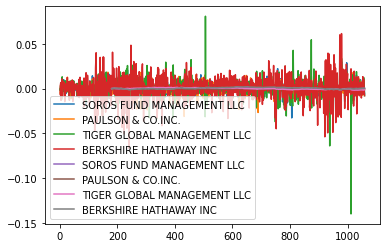

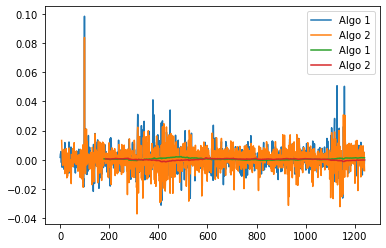

In [40]:
# Calculate the correlation
ax = Whale_Returns3.plot()
Whale_Returns3.rolling(window=180).mean().plot(ax=ax)

ax = algo_df3.plot()
algo_df3.rolling(window=180).mean().plot(ax=ax)
# Display de correlation matrix


In [42]:
SP500_Returns['Close'] = SP500_Returns['Close'].str.replace('$', '', regex=True)
SP500_Returns = SP500_Returns['Close'].astype("float")
SP500_Returns3

NameError: name 'SP500_Returns' is not defined

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [43]:
# Calculate covariance of a single portfolio
covariance = Whale_Returns3.cov(SP500_Returns3['Close'])
covariance
# Calculate variance of S&P 500
variance = daily_returns['SP500_Returns3'].var()
variance
# Computing beta
sp500_beta = covariance / variance
sp500_beta
# Plot beta trend
sp500_beta.plot()

TypeError: cannot convert the series to <class 'int'>

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_portfolios_returns.mean()-all_portfolios_returns['rf_rate'].mean()) * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

NameError: name 'all_portfolios_returns' is not defined

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

NameError: name 'sharpe_ratios' is not defined

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [47]:
# Reading data from 1st stock
costco_csv = Path("Resources/cost_historical.csv")
costco_df = pd.read_csv(costco_csv)
costco_df.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [48]:
# Reading data from 2nd stock
apple_csv = Path("Resources/aapl_historical.csv")
apple_df = pd.read_csv(apple_csv)
apple_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [49]:
# Reading data from 3rd stock
google_csv = Path("Resources/goog_historical.csv")
google_df = pd.read_csv(google_csv)
google_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [50]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([costco_df,apple_df,google_df], axis="rows",join="inner")
portfolio_df


,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62
...,...,...,...
245,GOOG,5/17/2018,1078.59
246,GOOG,5/16/2018,1081.77
247,GOOG,5/15/2018,1079.23
248,GOOG,5/14/2018,1100.20


In [53]:
# Reset Date index
portfolio_df.set_index("Trade DATE")

,Symbol,NOCP
Trade DATE,,
5/9/2019,COST,243.47
5/8/2019,COST,241.34
5/7/2019,COST,240.18
5/6/2019,COST,244.23
5/3/2019,COST,244.62
...,...,...
5/17/2018,GOOG,1078.59
5/16/2018,GOOG,1081.77
5/15/2018,GOOG,1079.23


In [54]:
# Reorganize portfolio data by having a column per symbol
portfolio_df = portfolio_df["Symbol"].split(" ", n = 1, expand = True)
portfolio_df

AttributeError: 'Series' object has no attribute 'split'

In [55]:
# Calculate daily returns
portfolio_daily_returns = (portfolio_df - portfolio_df.shift(1)) / portfolio_df.shift(1)
portfolio_daily_returns.head()
# Drop NAs
portfolio_daily_returns= portfolio_daily_returns.dropna().copy
portfolio_daily_returns
# Display sample data
portfolio_daily_returns.head()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [57]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
daily_returns = portfolio_df.pct_change()
daily_returns.head()

portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()
# Display sample data
portfolio_returns.plot()


TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [58]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns.concat(portfolio_returns)

AttributeError: 'Series' object has no attribute 'concat'

In [59]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns.dropna
daily_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

<AxesSubplot:xlabel='Date'>

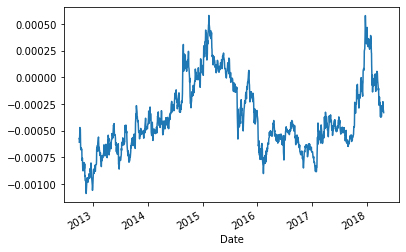

In [60]:
# Calculate the annualized `std`

daily_returns.rolling(window=251).mean().plot()

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

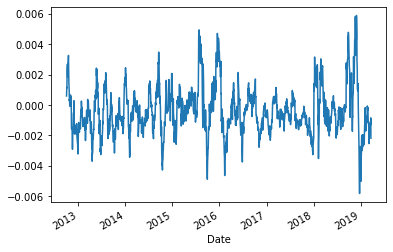

In [61]:
# Calculate rolling standard deviation
daily_returns.rolling(window=21).mean().plot()
# Plot rolling standard deviation


### Calculate and plot the correlation

In [62]:
# Calculate and plot the correlation
combined_df.plot(kind='scatter', x=['GOOG','COST','AAPL'], y='SP500')

NameError: name 'combined_df' is not defined

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [63]:
# Calculate and plot Beta
sns.lmplot(x='SP500', y=['GOOG','COST','AAPL'], data=daily_returns, aspect=1.5, fit_reg=True)

NameError: name 'sns' is not defined

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios2 = ((daily_returns.mean()-daily_returns['rf_rate'].mean()) * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios2

KeyError: 'rf_rate'

In [66]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot()

NameError: name 'sharpe_ratios2' is not defined

### How does your portfolio do?

Write your answer here!

In [64]:
#It does well with logic but it gets many syntax errors. I am very new to this